# Classification

In this notebook we will learn about:

1. Classification Task in Data science

3. Logestic Regression

## **What is classification?**

Classification is a supervised learning task where the goal is to predict a __categorical label__ for a given input.

 In classification, just like in regression, we have a set of training data points $(x_1, y_1), \dots, (x_n, y_n)$ to build a classifier. The difference is, the $y_i$ values are **categorical**, representing different classes. Our goal is for the classifier to perform well not only on the training data but also on new, unseen test data. If we have only two classes, it is called **binary classification**, and if there are more than two classes, it is referred to as **multi-class classification**.

Common classification problems include spam detection (binary), sentiment analysis (binary or multi-class), image recognition (multi-class), and medical diagnosis (binary or multi-class). For example,


1. A person arrives at the emergency room with a set of symptoms that could possibly be attributed to one of three medical conditions.
Which of the three conditions does the individual have?


2. An online banking service must be able to determine whether or not a transaction being performed on the site is fraudulent, on the basis
of the user’s IP address, past transaction history, and so forth.


3. On the basis of DNA sequence data for a number of patients with and without a given disease, a biologist would like to figure out which
DNA mutations are deleterious (disease-causing) and which are not.

The focus of this notebook is binary classification. Let's go!

__Example of a Binary classification__

The Breast Cancer dataset is a well-known dataset in the field of machine learning and statistics, commonly used for classification tasks. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

The dataset consists of 30 numerical features describing characteristics of the cell nuclei present in the images, such as:
  - Mean radius
  - Mean texture
  - Mean perimeter
  - Mean area
  - Mean smoothness
  - And more...


The target variable is binary, indicating whether the tumor is malignant (encoded as 1) or benign (encoded as 0).  

The goal is to build a classifier that can accurately predict whether a tumor is malignant or benign based on the provided features.

Let's look at the dataset:






In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



In [13]:
# Display the a few rows of the dataset
print(df.sample(4))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
158        12.06         12.74           76.84      448.6          0.09311   
474        10.88         15.62           70.41      358.9          0.10070   
389        19.55         23.21          128.90     1174.0          0.10100   
256        19.55         28.77          133.60     1207.0          0.09260   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
158           0.05241         0.01972              0.01963         0.1590   
474           0.10690         0.05115              0.01571         0.1861   
389           0.13180         0.18560              0.10210         0.1989   
256           0.20630         0.17840              0.11440         0.1893   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
158                 0.05907  ...          18.41            84.08       532.8   
474                 0.06837  ...          19.35            80.7

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

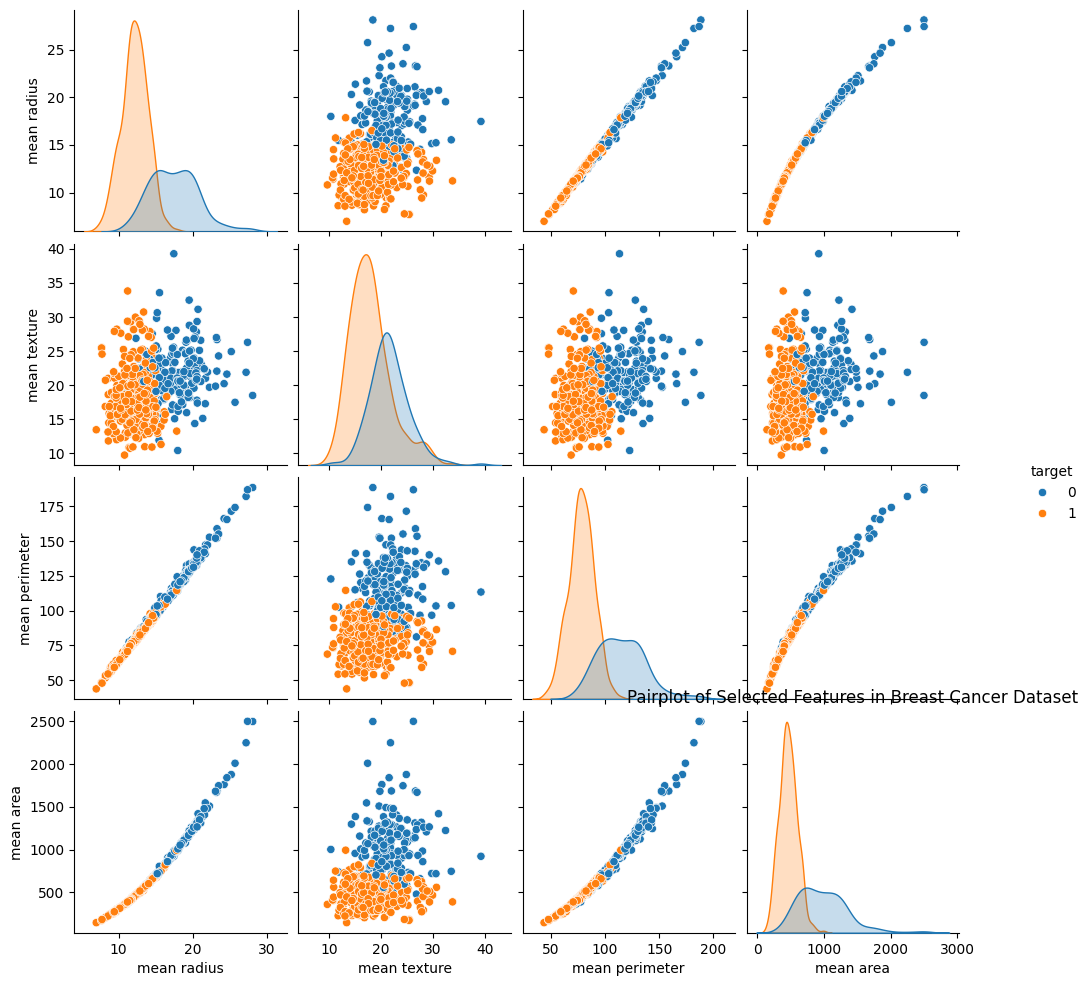

In [14]:
# Visualizing the distribution of features
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
plt.title('Pairplot of Selected Features in Breast Cancer Dataset')
plt.show()


As you can see these feature can classify the target values! Bu how do we develop a classifier that automate the process?


## 2. **Binary Classification Using Logistic Regression**


**Logistic Regression Overview:**

Logistic regression models the probability that an observation, based on its features, belongs to a particular category (target).

Recall that in the breast cancer dataset, the target variable is binary, indicating whether the tumor is malignant (encoded as 1) or benign (encoded as 0).

For example, we can represent the target variable $ Y$ as follows:
$$
Y =
\begin{cases}
0 & \text{if malignant} \\
1 & \text{if benign}
\end{cases}
$$


So for example the probability that the tumor is malignant, given its measurements, can be expressed as:

$$
p(X) = \Pr(Y = 0 | X)
$$
where $X$ represents the measurements.

Equivalently, the probability that the tumor is bening, given its measurements, is:

$$
p(X) = \Pr(Y = 1 | X)
$$

To model this relationship, we can use a linear regression approach to fit $Y$ against $X$. Then we apply the **logistic function (sigmoid)** to the output of the linear regression. The logistic function maps the linear regression output to a range between 0 and 1, which can then be interpreted as a probability.

Here is the formula:
$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X)}} \quad \quad (*)
$$

where $\beta_0$ and $\beta_1$ are the coefficients of the simple linear regresstion.

####**Logestic Regression for Breast Cancer Dataset**

In [15]:
# Select features and target
X = df[data.feature_names]  # All features
y = df['target']  # Target variable

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and fit logistic regression model


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


Now, let's create a new data point to classify. For example, let’s say we want to predict whether a tumor is malignant or benign based on the following features (scaled measurements):

In [20]:
# Get the feature names from the dataset
feature_names = data.feature_names

# Create a new data point with 30 features
new_data = pd.DataFrame([[14.0, 20.0, 85.0, 550.0, 0.1,
                          0.2, 0.3, 0.4, 0.5, 0.1,
                          0.2, 0.3, 0.4, 0.5, 0.6,
                          0.7, 0.8, 0.9, 1.0, 1.1,
                          1.2, 1.3, 1.4, 1.5, 1.6,
                          1.7, 1.8, 1.9, 2.0, 2.1]],
                        columns=feature_names)

In [21]:
# Get the predicted probabilities
proba = model.predict_proba(new_data)

# The output will contain two probabilities:
# - proba[0][0] is the probability of class 0 (Benign)
# - proba[0][1] is the probability of class 1 (Malignant)

print(f"Probability of Benign: {proba[0][0]}")
print(f"Probability of Malignant: {proba[0][1]}")


Probability of Benign: 8.609846169349566e-11
Probability of Malignant: 0.9999999999139015


If the predicted probability is greater than or equal to 0.5, the model predicts class 1 (Malignant).
If the predicted probability is less than 0.5, the model predicts class 0 (Benign). So the predicted tumor for this new data is Malignant.

Alternatively, we could do this directly:

In [22]:
# Make a prediction
prediction = model.predict(new_data)

# Interpret the prediction
if prediction[0] == 0:
    print("The predicted tumor is Benign.")
else:
    print("The predicted tumor is Malignant.")


The predicted tumor is Malignant.


#### **Odds and Logit**

Manipulating (*), we get:
$$
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$$


The left-hand side, called __the odds__, can take any value between $0$ and $\infty$. Values of the odds close to $0$ and $\infty$ indicate very low and very high probabilities of the observation belonging to a particular category, respectively.


By taking the logarithm of both sides, we arrive at the equation for __log odds__ or __logit__:
$$
\log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X
$$

In other words, the logit is a linear function of the features.

The coefficients $\beta_1$ and  $\beta_2$ represent the change in the log odds associated with a one-unit increase in each corresponding feature $ X_1$ and $X_2$. While $ \beta_i $ indicates how the log odds change, it does not directly translate to a change in the probability $p(X)$. Instead, it can be interpreted in terms of odds:

- If $\beta_i$ is positive, an increase in $X_i$ is associated with an increase in the probability $ p(X)$.


- If $\beta_i$ is negative, an increase in $X_i$ corresponds to a decrease in the probability $p(X)$.



So the effect of a one-unit increase in each feature $X_i$ on $p(X)$ varies depending on the current values of all the features. As a result, the relationship between $ p(X)$ and $X$ is not linear. This non-linear nature of the logistic function allows it to capture complex relationships between the features and the target variable.

#### **How to read odds and logit?**

Recall that
$$
\text{Odds} = \frac{p(X)}{1 - p(X)}
$$

So

$$
\text{probability} = \frac{odds}{1 + odds}
$$

If the odds of the tumor being cancerous is  $1/4$, this implies a probability of:
$$
p(X) = \frac{1/4}{1 + 1/4} = 0.2
$$

This means, on average, 1 in 5 observations with these odds will belong to the malignant category.

Conversely, odds of $9$ imply a probability of:
$$
p(X) = \frac{9}{9 + 1} = 0.9
$$
showing that, on average, 9 out of 10 tumor observations will be malignant.

__Excercise__


(1) For the following new data point,

  - Use the trained logistic regression model to predict the probabilities of both classes.

  - Calculate the log odds and odds based on the coefficients of the logistic regression model.

  - How do you read the odds for the benign class?

  - Suppose that you are not happy with threshold = 0.5 and want to use a custom threshold, say 0.7. Make a prediction for the new data point using this threshold.


2-  When implementing logistic regression using libraries like scikit-learn, the max_iter parameter specifies the maximum number of iterations that the optimization algorithm will take to converge to a solution. This parameter is crucial for ensuring that the model finds the best-fitting parameters during training. To see how it might affect the result follow the following steps:

  - (a) In the implementation of logistic regression on the Breast Cancer dataset, set the max_iter parameter to 1000 and fit the model. Analyze whether the model converged successfully or if it failed to find an optimal solution.

  - (b) Do the same thing but this time for max_iter = 20000.

  - (c) What conclusions can you draw about the importance of the max_iter parameter in the context of logistic regression?




In [23]:
import numpy as np

# New data point (example features from the breast cancer dataset)

new_data = pd.DataFrame([[15, 25, 100, 700, 0.1, 0.2, 0.3, 0.1, 0.2, 0.1,
                      1, 2, 5, 40, 0.005, 0.01, 0.02, 0.005, 0.01, 0.002,
                      16, 26, 105, 750, 0.12, 0.25, 0.35, 0.12, 0.25, 0.1]],
                        columns=feature_names)